# Sentiment Analysis


### Metodología 2

Creación de un propio método de análisis de sentimientos

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
cols = ['sentiment','id','date','query_string','user','text']

train = pd.read_csv('data/training.1600000.processed.noemoticon.csv', 
                    header=None, names=cols, encoding = "ISO-8859-1")

test = pd.read_csv('data/testdata.manual.2009.06.14.csv', header=None, names=cols)

In [3]:
train

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
train.sentiment.value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

# Preprocesado a los datos

## Limpieza del tweet

In [5]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [6]:
from bs4 import BeautifulSoup
import re

pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    
    # HTML Decoding
    soup = BeautifulSoup(text, 'lxml')
    
    # @Menciones, URL links
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    
    # Hashtag, números
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    
    # LoweCaseFilter (términos en minúscula)
    lower_case = letters_only.lower()
    
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    
    return (" ".join(words)).strip()

## Eliminación palabras vacías y Stemming

In [7]:
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.model_selection import train_test_split

In [8]:
import nltk
nltk.download('wordnet')

# English Stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /home/jose/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jose/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def preprocesar_texto_tweet(tweet):
    
    # Ya los teníamos convertidos a minúscula
    
    # Eliminamos las palabras vacías (Filtramos aquellas que no lo son) 
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [word for word in tweet_tokens if word not in stop_words]
    
    # Stemming
    ps = PorterStemmer()
    stemmed_words = [ps.stem(w) for w in filtered_words]
    
    # Lematización
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(lemma_words)

In [10]:
nums = [0,400000,800000,1200000,1600000]

In [11]:
%%time
print ("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []

for i in range(nums[0],nums[1]):
    
    if((i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % (i+1, nums[1]))
    
    clean = tweet_cleaner(train['text'][i])
    cleaner = preprocesar_texto_tweet(clean)
    clean_tweet_texts.append(cleaner)

Cleaning and parsing the tweets...

Tweets 10000 of 400000 has been processed
Tweets 20000 of 400000 has been processed
Tweets 30000 of 400000 has been processed
Tweets 40000 of 400000 has been processed
Tweets 50000 of 400000 has been processed
Tweets 60000 of 400000 has been processed
Tweets 70000 of 400000 has been processed
Tweets 80000 of 400000 has been processed
Tweets 90000 of 400000 has been processed
Tweets 100000 of 400000 has been processed
Tweets 110000 of 400000 has been processed
Tweets 120000 of 400000 has been processed
Tweets 130000 of 400000 has been processed
Tweets 140000 of 400000 has been processed
Tweets 150000 of 400000 has been processed
Tweets 160000 of 400000 has been processed
Tweets 170000 of 400000 has been processed
Tweets 180000 of 400000 has been processed
Tweets 190000 of 400000 has been processed
Tweets 200000 of 400000 has been processed
Tweets 210000 of 400000 has been processed
Tweets 220000 of 400000 has been processed
Tweets 230000 of 400000 has

In [12]:
len(clean_tweet_texts)

400000

In [13]:
%%time
print ("Cleaning and parsing the tweets...\n")

for i in range(nums[1],nums[2]):
    
    if((i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % (i+1, nums[2]))
    
    clean = tweet_cleaner(train['text'][i])
    cleaner = preprocesar_texto_tweet(clean)
    clean_tweet_texts.append(cleaner)

Cleaning and parsing the tweets...

Tweets 410000 of 800000 has been processed
Tweets 420000 of 800000 has been processed
Tweets 430000 of 800000 has been processed
Tweets 440000 of 800000 has been processed
Tweets 450000 of 800000 has been processed
Tweets 460000 of 800000 has been processed
Tweets 470000 of 800000 has been processed
Tweets 480000 of 800000 has been processed
Tweets 490000 of 800000 has been processed
Tweets 500000 of 800000 has been processed
Tweets 510000 of 800000 has been processed
Tweets 520000 of 800000 has been processed
Tweets 530000 of 800000 has been processed
Tweets 540000 of 800000 has been processed
Tweets 550000 of 800000 has been processed
Tweets 560000 of 800000 has been processed
Tweets 570000 of 800000 has been processed
Tweets 580000 of 800000 has been processed
Tweets 590000 of 800000 has been processed
Tweets 600000 of 800000 has been processed
Tweets 610000 of 800000 has been processed
Tweets 620000 of 800000 has been processed
Tweets 630000 of 8

In [14]:
len(clean_tweet_texts)

800000

In [15]:
%%time
print ("Cleaning and parsing the tweets...\n")

for i in range(nums[2],nums[3]):
    
    if((i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % (i+1, nums[3]))
    
    clean = tweet_cleaner(train['text'][i])
    cleaner = preprocesar_texto_tweet(clean)
    clean_tweet_texts.append(cleaner)

Cleaning and parsing the tweets...

Tweets 810000 of 1200000 has been processed
Tweets 820000 of 1200000 has been processed
Tweets 830000 of 1200000 has been processed
Tweets 840000 of 1200000 has been processed
Tweets 850000 of 1200000 has been processed
Tweets 860000 of 1200000 has been processed
Tweets 870000 of 1200000 has been processed
Tweets 880000 of 1200000 has been processed
Tweets 890000 of 1200000 has been processed
Tweets 900000 of 1200000 has been processed
Tweets 910000 of 1200000 has been processed
Tweets 920000 of 1200000 has been processed
Tweets 930000 of 1200000 has been processed
Tweets 940000 of 1200000 has been processed
Tweets 950000 of 1200000 has been processed
Tweets 960000 of 1200000 has been processed
Tweets 970000 of 1200000 has been processed
Tweets 980000 of 1200000 has been processed
Tweets 990000 of 1200000 has been processed
Tweets 1000000 of 1200000 has been processed
Tweets 1010000 of 1200000 has been processed
Tweets 1020000 of 1200000 has been pro

In [16]:
len(clean_tweet_texts)

1200000

In [17]:
%%time
print ("Cleaning and parsing the tweets...\n")

for i in range(nums[3],nums[4]):
    
    if((i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % (i+1, nums[4]))
    
    clean = tweet_cleaner(train['text'][i])
    cleaner = preprocesar_texto_tweet(clean)
    clean_tweet_texts.append(cleaner)

Cleaning and parsing the tweets...

Tweets 1210000 of 1600000 has been processed
Tweets 1220000 of 1600000 has been processed
Tweets 1230000 of 1600000 has been processed
Tweets 1240000 of 1600000 has been processed
Tweets 1250000 of 1600000 has been processed
Tweets 1260000 of 1600000 has been processed
Tweets 1270000 of 1600000 has been processed
Tweets 1280000 of 1600000 has been processed
Tweets 1290000 of 1600000 has been processed
Tweets 1300000 of 1600000 has been processed
Tweets 1310000 of 1600000 has been processed
Tweets 1320000 of 1600000 has been processed
Tweets 1330000 of 1600000 has been processed
Tweets 1340000 of 1600000 has been processed
Tweets 1350000 of 1600000 has been processed
Tweets 1360000 of 1600000 has been processed
Tweets 1370000 of 1600000 has been processed
Tweets 1380000 of 1600000 has been processed
Tweets 1390000 of 1600000 has been processed
Tweets 1400000 of 1600000 has been processed
Tweets 1410000 of 1600000 has been processed
Tweets 1420000 of 1

### Guardamos los datos procesados en un nuevo .csv

In [18]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = train.sentiment
clean_df.head()

,text,target
0,awww bummer shoulda got david carr third day,0
1,upset updat facebook text might cri result sch...,0
2,dive mani time ball manag save rest go bound,0
3,whole bodi feel itchi like fire,0
4,behav mad see,0


In [19]:
clean_df.to_csv('clean_tweet.csv',encoding='utf-8', header=False, index=False)

In [27]:
cols = ['text', 'sentiment']
clean_train = pd.read_csv('clean_tweet.csv', header=None, names=cols)

In [28]:
clean_train

,text,sentiment
0,awww bummer shoulda got david carr third day,0
1,upset updat facebook text might cri result sch...,0
2,dive mani time ball manag save rest go bound,0
3,whole bodi feel itchi like fire,0
4,behav mad see,0
...,...,...
1599995,woke school best feel ever,4
1599996,thewdb com cool hear old walt interview bmta,4
1599997,readi mojo makeov ask detail,4
1599998,happi th birthday boo alll time tupac amaru sh...,4


In [29]:
clean_train = clean_train.dropna()

### Obtención de los términos más frecuentes

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer()
cvec.fit(clean_train.text)

neg_doc_matrix = cvec.transform(clean_train[clean_train.sentiment == 0].text)
pos_doc_matrix = cvec.transform(clean_train[clean_train.sentiment == 4].text)

neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)

neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))

term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
go,79353,59346,138699
good,40472,75354,115826
get,61579,49265,110844
day,52238,57058,109296
work,59000,28793,87793
like,43265,40573,83838
love,21858,61006,82864
got,38921,32190,71111
today,38371,30342,68713
time,31784,34610,66394


Text(0.5, 1.0, 'Top 50 tokens in negative tweets')

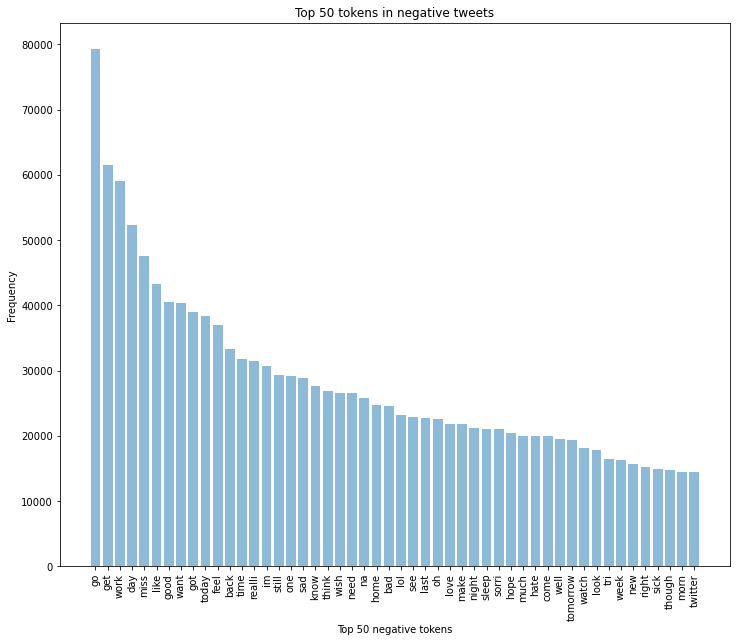

In [31]:
y_pos = np.arange(50)

plt.figure(figsize=(12,10))
plt.bar(y_pos, 
        term_freq_df.sort_values(by='negative',ascending=False)       
                                  ['negative'][:50], 
                                  align='center', 
                                  alpha=0.5)
plt.xticks(y_pos, 
           term_freq_df.sort_values(by='negative',ascending=False) 
                                     ['negative']   
                                     [:50].index,
                                     rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

Text(0.5, 1.0, 'Top 50 tokens in positive tweets')

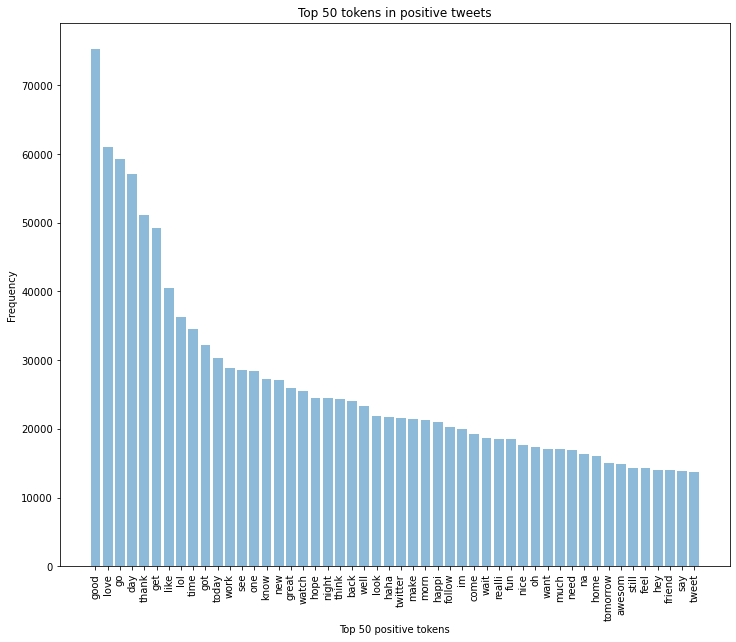

In [32]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, 
        term_freq_df.sort_values(by='positive',ascending=False)       
                                  ['positive'][:50], 
                                  align='center', 
                                  alpha=0.5)
plt.xticks(y_pos, 
           term_freq_df.sort_values(by='positive',ascending=False) 
                                     ['positive']   
                                     [:50].index,
                                     rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')

In [ ]:
from wordcloud import WordCloud

text = []
for t in clean_train.text:
    text.append(t)
text = pd.Series(text).str.cat(sep=' ')
wordcloud = WordCloud(width=1600,
                      height=800,
                      max_font_size=200
                     ).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()